# Visualizar datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [157]:
datos = pd.DataFrame(data={
    "A": np.random.standard_normal(1000),
    "B": np.random.standard_exponential(1000),
    "C": np.random.choice(["Tipo 1", "Tipo 2", "Tipo 3"],1000,p=[0.3,0.5,0.2]),
    "D": np.random.choice(["Clase A", "Clase B", "Clase C", "Clase D"],1000),
    "E": np.random.choice(["sí", "no"],1000, p=[0.3,0.7]),
    "F": np.random.binomial(10,0.3,1000)
})
datos.head()

,A,B,C,D,E,F
0,-1.097649,1.245190,Tipo 2,Clase B,sí,3
1,1.061828,0.005998,Tipo 2,Clase A,no,7
2,-0.654512,0.938067,Tipo 2,Clase A,no,3
3,-0.005015,0.095180,Tipo 2,Clase D,no,1
4,-0.593829,0.003915,Tipo 3,Clase B,sí,4


## Visualización univariada

### Gráfica de barras

Muestra una barra cuya altura representa un valor, el cual puede ser el recuento de registros, el promedio de una variable, etc. También se puede usar para representar la distribución de frecuencias absolutas de una variable categórica.

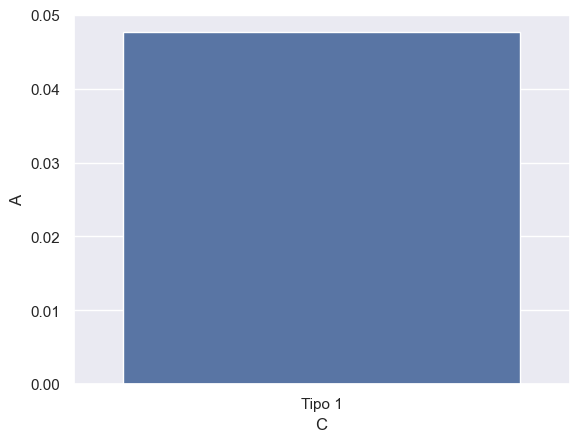

In [158]:
sns.barplot(
    data=datos[datos["C"]=="Tipo 1"],
    x="C",y="A",
    estimator="mean",
    errorbar=None
)
plt.show()

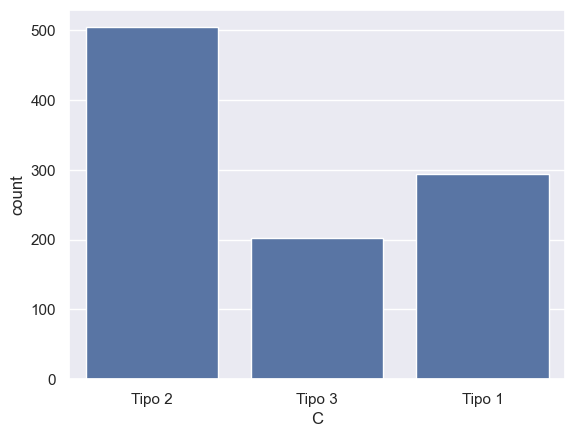

In [159]:
sns.countplot(data=datos, x="C")
plt.show()

### Gráfica de pastel

Muestra la distribución porcentual de los grupos de una variable categórica.

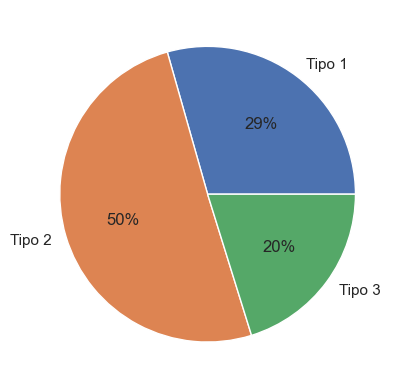

In [160]:
df = datos.groupby("C").size()
plt.pie(df, labels = df.index, autopct='%.0f%%')
plt.show()

### Histograma

Este tipo de visualización consiste en dividir el rango de una variable numérica en múltiples grupos, contar el número de registros con valores dentro de dichos grupos y graficar barras para cada grupo con altura igual a su frecuencia.

- Si la altura de las barras es la frecuencia absoluta y el ancho de los grupos es el mismo para todos, se llama histograma de frec. absoluta

- Si la altura de las barras es la frecuencia absoulta de cada grupo dividida entre el ancho del grupo, y el ancho de los grupos es el mismo para todos, se llama histograma de frec. relativa

- Si se normalizan las alturas de las barras de forma que el área total del histograma sea igual a 1, se llama histograma de densidad

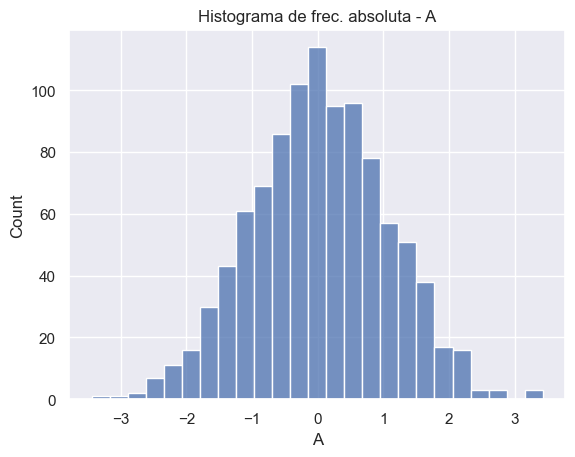

In [161]:
sns.histplot(data=datos, x="A")
plt.title("Histograma de frec. absoluta - A")
plt.show()

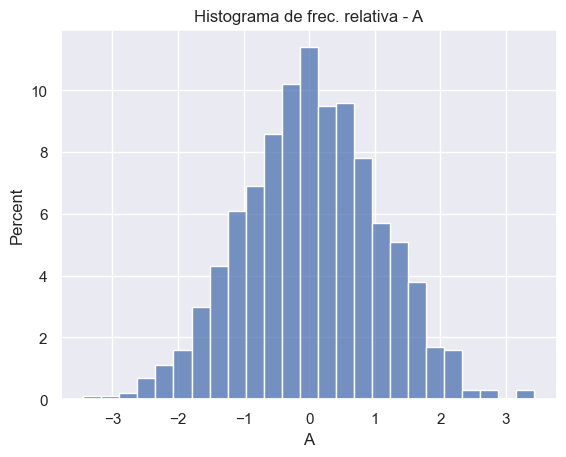

In [162]:
sns.histplot(data=datos, x="A", stat="percent")
plt.title("Histograma de frec. relativa - A")
plt.show()

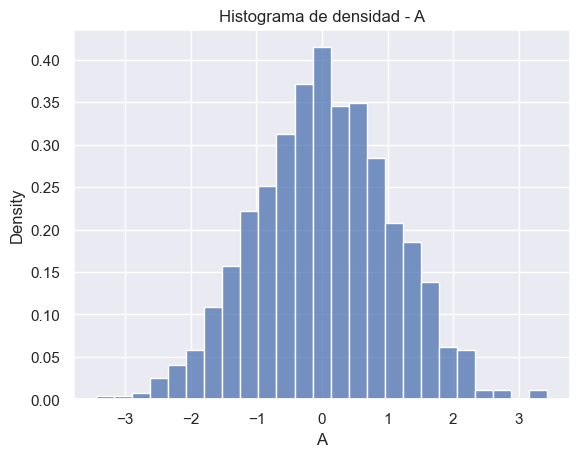

In [163]:
sns.histplot(data=datos, x="A", stat="density")
plt.title("Histograma de densidad - A")
plt.show()

### Gráfica de KDE (Kernel Density Estimation)

Representa una estimación continua a la función de densidad de la distribución implícita en los datos. Utiliza un kernel Gaussiano para realizar la estimación.

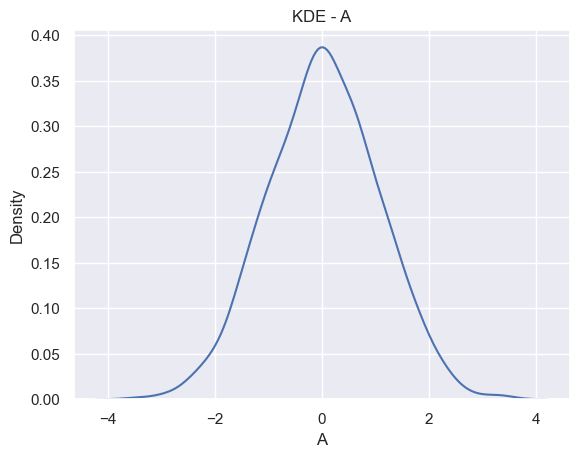

In [164]:
sns.kdeplot(data=datos, x="A")
plt.title("KDE - A")
plt.show()

### Gráfica de caja y bigotes (boxplot)

Este tipo de gráfico muestra varios cuantiles importantes en la distribución. Los valores representados en la gráfica son:

- $\max\{ \min(\text{datos}), p_{25} -1.5\cdot \text{IQR} \}$ con $p_{25}$ el percentil al 25% e $\text{IQR}$ el rango intercuartil

- Percentil al 25%

- Percentil al 50% o Mediana

- Percentil al 75%

- $\min\{ \max(\text{datos}), p_{75} + 1.5\cdot \text{IQR} \}$ con $p_{25}$ el percentil al 75% e $\text{IQR}$ el rango intercuartil

El primer y último valores son representados con los bigotes, el rango intercuartil entre el $p_{25}$ y el $p_{75}$ con una caja y la mediana con una línea dentro de la caja. Los valores que estén por encima o por debajo de los bigotes se muestran con puntos y se consideran outliers o valores atípicos.

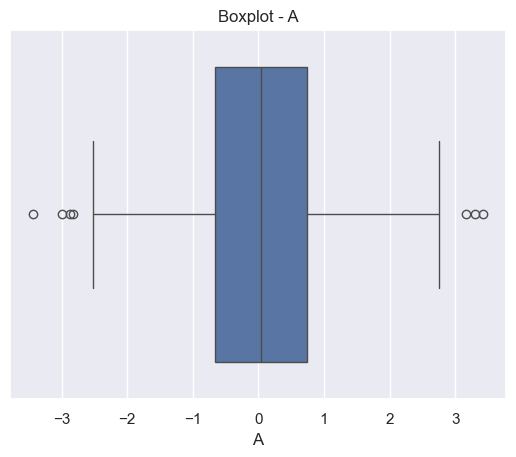

In [165]:
sns.boxplot(data=datos, x="A")
plt.title("Boxplot - A")
plt.show()

Las gráficas de caja y bigotes también pueden ser utilizadas para visualizar un resumen de la variabilidad en los datos en múltiples grupos o a través de varios experimentos.

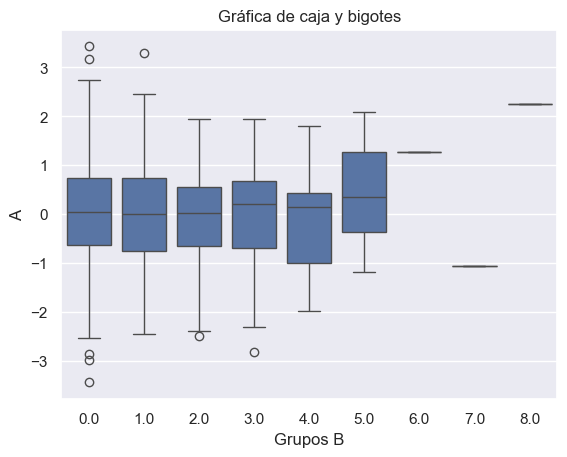

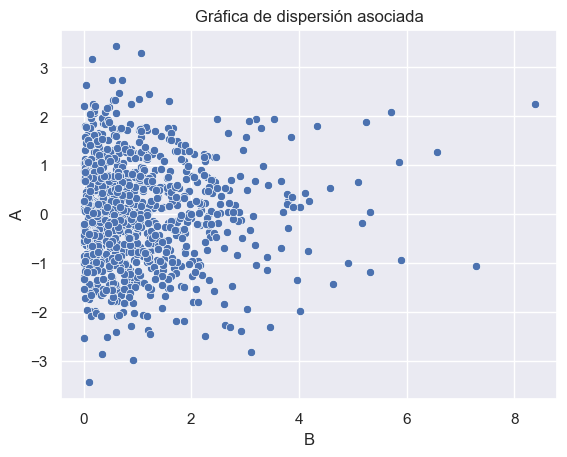

In [166]:
df = datos.copy()
df["Grupos B"] = np.floor(df["B"])

sns.boxplot(
    data=df,
    x="Grupos B", y="A"
)
plt.title("Gráfica de caja y bigotes")
plt.show()

sns.scatterplot(
    data=df,
    x="B", y="A"
)
plt.title("Gráfica de dispersión asociada")
plt.show()

### Gráfica de violín

Es una combinación entre un gráfico KDE y un gráfico de caja y bigotes. Muestra una distribución estimada con KDE y muestra el rango intercuartil + mediana.

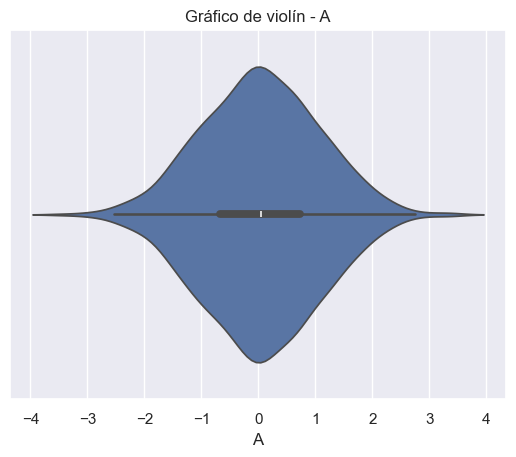

In [167]:
sns.violinplot(data=datos, x="A")
plt.title("Gráfico de violín - A")
plt.show()

### Strip plot

Representa una "gráfica de dispersión" para una variable, donde se agrega un *jitter*, o variación aleatoria, a las observaciones para poder visualizar la cantidad de puntos minimizando la superposición de unos puntos con otros.

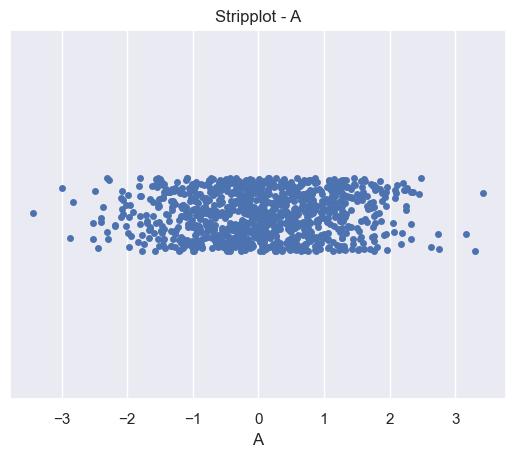

In [168]:
sns.stripplot(data=datos, x="A")
plt.title("Stripplot - A")
plt.show()

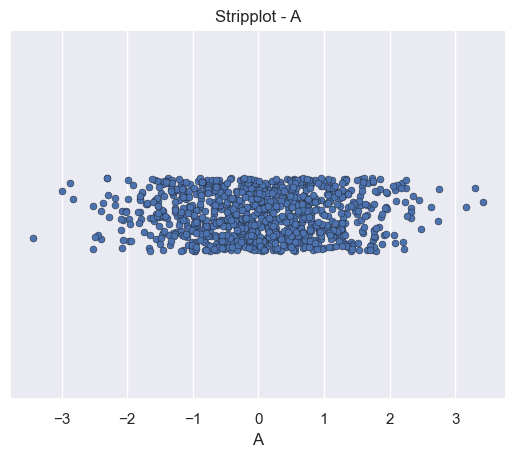

In [169]:
sns.stripplot(
    data=datos, x="A",
    edgecolor="k", linewidth=0.3
)
plt.title("Stripplot - A")
plt.show()

### Swarmplot

Similar a una stripplot, pero representa de forma más precisa la distribución de la variable al mostrar puntos no sobrepuestos y de froma que representen la forma de la distribución. Recomenada para conjuntos de datos no grandes.

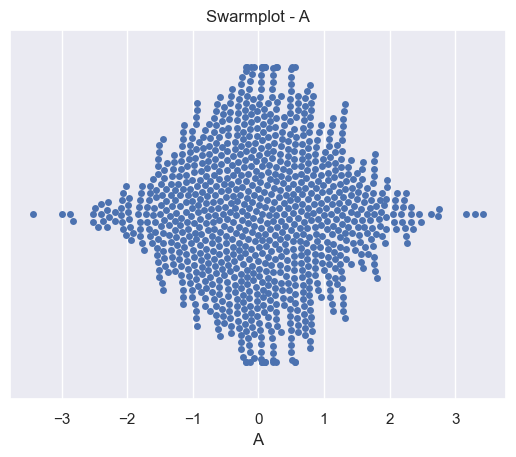

In [170]:
sns.swarmplot(data=datos, x="A")
plt.title("Swarmplot - A")
plt.show()

c:\Users\jorge\miniconda3\envs\code\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


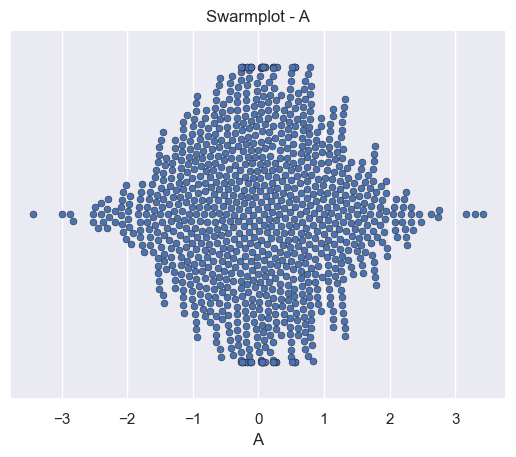

In [171]:
sns.swarmplot(
    data=datos, x="A",
    edgecolor="k", linewidth=0.3
)
plt.title("Swarmplot - A")
plt.show()

### Boxenplot

Similar a una gráfica de caja y bigotes, pero muestra más percentiles de la distribución.

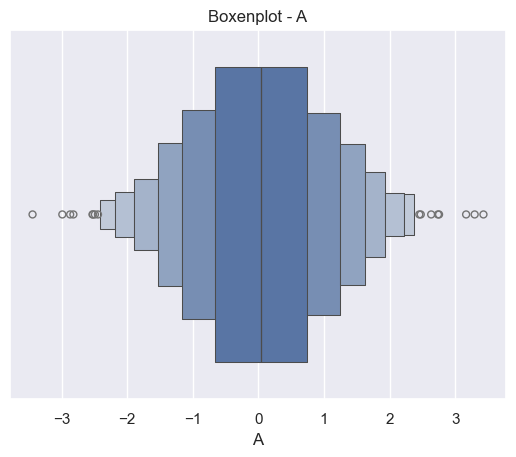

In [172]:
sns.boxenplot(data=datos, x="A", width_method="area")
plt.title("Boxenplot - A")
plt.show()

## Visualización bivariable

### Tabla de contingencia -> Heatmap

Para dos atributos categóricos con $p$ y $q$ posibles valores, se crea una tabla de tamaño $p\times q$, donde la entrada $(i,j)$ representa dicha frecuencia de la combinación de valores de cada atributo.

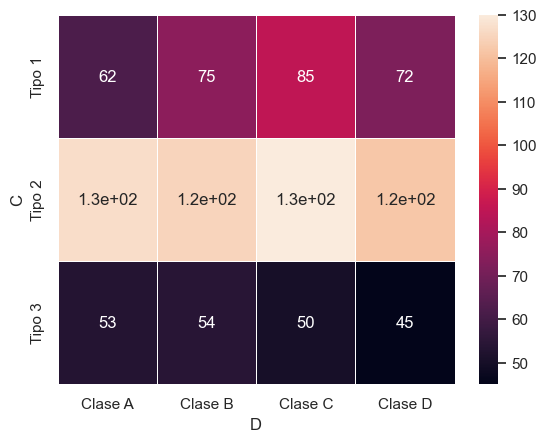

In [173]:
tabla_contingencia = pd.pivot_table(
    datos,
    values="A",
    index="C",
    columns="D",
    aggfunc="count"
)
sns.heatmap(tabla_contingencia, annot=True, linewidth=0.5)
plt.show()

### Gráfica de barras (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra barras cuyas alturas representan un valor para cada grupo representado, el cual puede ser el recuento de registros, el promedio de una variable, etc.

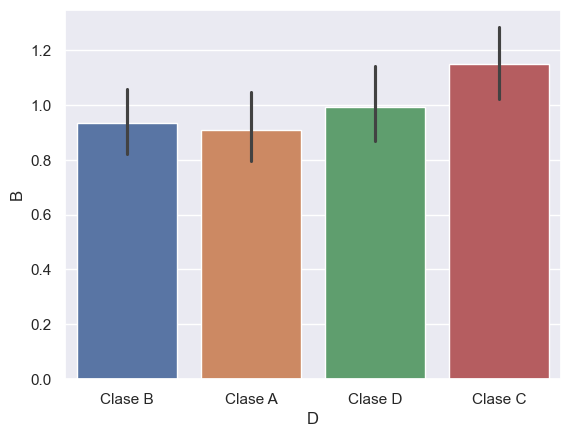

In [203]:
sns.barplot(
    data=datos,
    x="D",y="B", hue="D",
    estimator="mean",
    errorbar="ci"
)
plt.show()

### Gráfica de caja (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra una [gráfica de caja](#gráfica-de-caja-y-bigotes-boxplot) para cada grupo en la variable categórica.

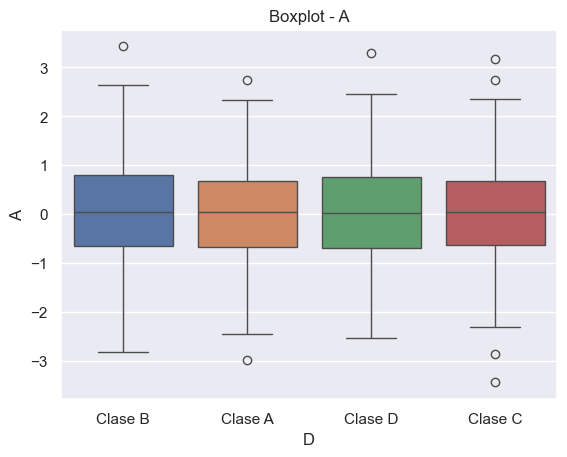

In [175]:
sns.boxplot(data=datos, x="D", y="A", hue="D")
plt.title("Boxplot - A")
plt.show()

### Gráfica de violín (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra una [gráfica de violín](#gráfica-de-violín) para cada grupo en la variable categórica.

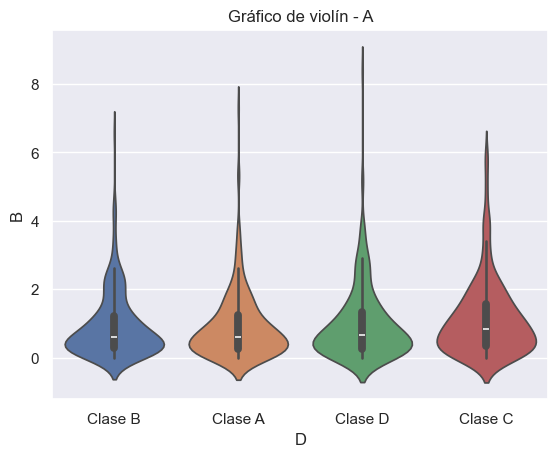

In [176]:
sns.violinplot(data=datos, x="D", y="B", hue="D")
plt.title("Gráfico de violín - A")
plt.show()

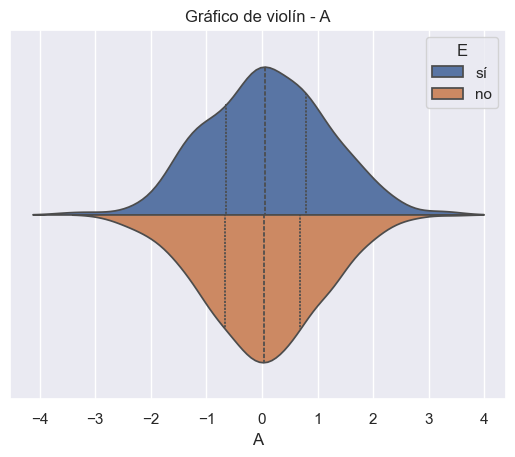

In [177]:
sns.violinplot(data=datos, x="A", hue="E", split=True, inner="quart")
plt.title("Gráfico de violín - A")
plt.show()

### Strip plot (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra una [stripplot](#strip-plot) para cada grupo en la variable categórica.

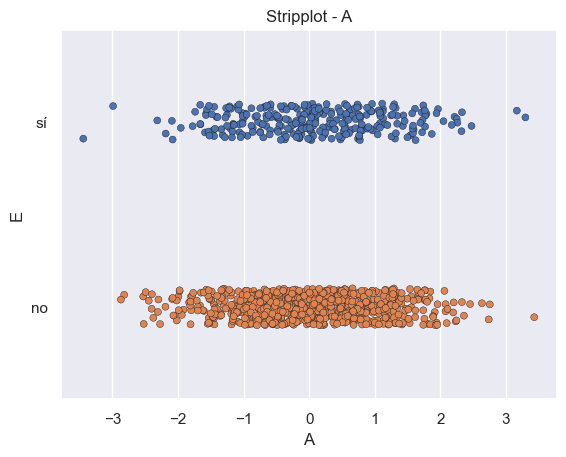

In [178]:
sns.stripplot(
    data=datos, x="A", y="E",
    hue="E", edgecolor="k",
    linewidth=0.3
)
plt.title("Stripplot - A")
plt.show()

### Swarmplot (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra una [swarmplot](#swarmplot) para cada grupo en la variable categórica.

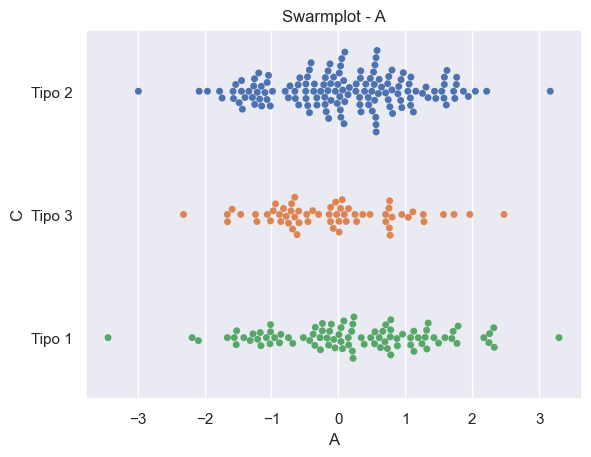

In [179]:
sns.swarmplot(
    data=datos[datos["E"]=="sí"], x="A", y="C",
    hue="C"
)
plt.title("Swarmplot - A")
plt.show()

### Boxenplot (2 var)

Gráfica para comparar una variable categórica y una variable numérica. Muestra una [boxenplot](#boxenplot) para cada grupo en la variable categórica.

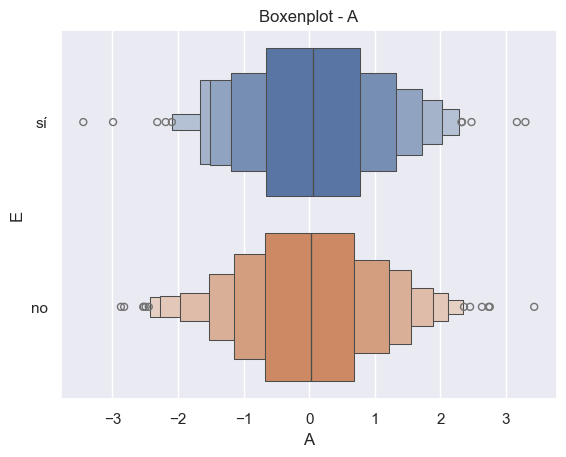

In [180]:
sns.boxenplot(
    data=datos, x="A", y="E",
    hue="E", width_method="area"
)
plt.title("Boxenplot - A")
plt.show()

### Gráfica de dispersión

Muestra puntos $(x,y)$ en un plano donde los ejes representan 2 variables numéricas.

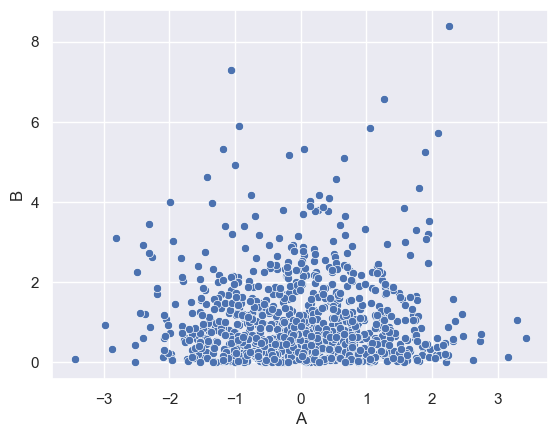

In [181]:
sns.scatterplot(
    data=datos, x="A", y="B"
)
plt.show()

### Gráfica de líneas

Muestra la relación entre dos variables, una categórica o numérica y una numérica. Si no hay valores "x" repetidos correspondientes a los valores "y", se dibuja una línea recta entre cada punto $(x,y)$. En caso contrario, se muestran las líneas rectas entre los puntos $(x,\hat{y})$ y adicionalmente se muestra el intervalo de confianza al 95%.

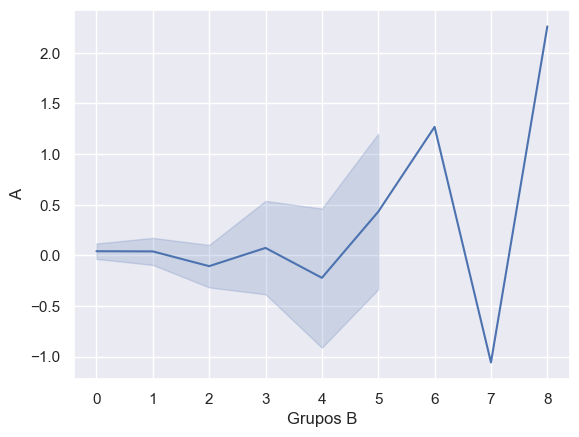

In [182]:
df = datos.copy()
df["Grupos B"] = np.floor(df["B"])
sns.lineplot(
    data=df, x="Grupos B", y="A"
)
plt.show()

### Histograma 2D

Gráfica para comparar dos variables numéricas. Para cada variable se crean las divisiones de sus rangos numéricos, generando así una "cuadrícula" donde se mostrarán las frecuencias absolutas, relativas o densidades con una paleta de colores.

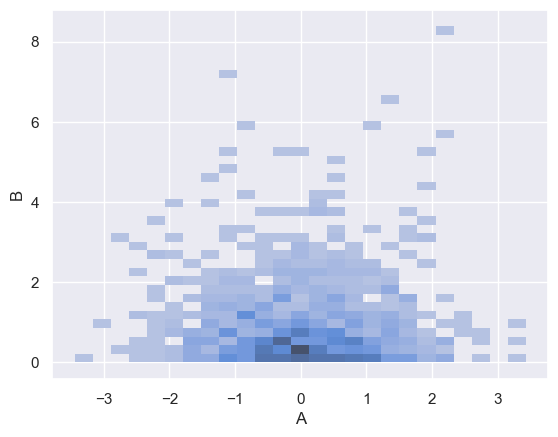

In [183]:
sns.histplot(
    data=datos, x="A", y="B"
)
plt.show()

### Gráfica de KDE 2D

Gráfica para comparar dos variables numéricas. Análoga al [histograma 2d](#histograma-2d) y [gráfica KDE](#gráfica-de-kde-kernel-density-estimation).

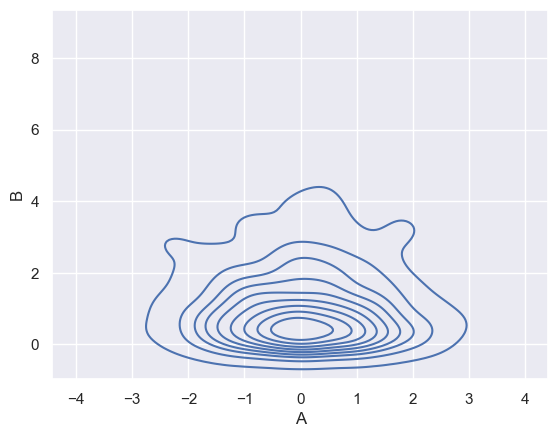

In [184]:
sns.kdeplot(
    data=datos, x="A", y="B"
)
plt.show()

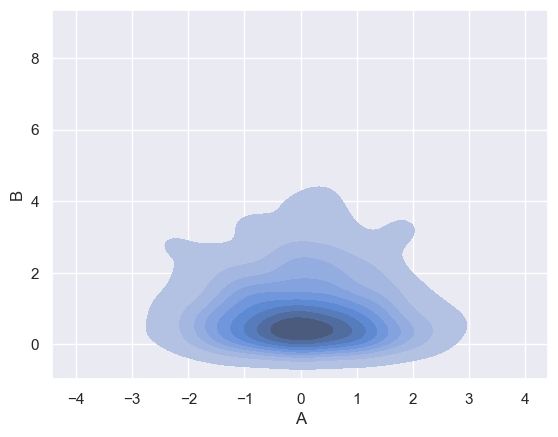

In [185]:
sns.kdeplot(
    data=datos, x="A", y="B",
    fill=True
)
plt.show()

### Rugplot

Gráfica para mostrar distribuciones marginales de variables numéricas; está pensada para complementar otras gráficas. Muestra la distribución marginal de una variable como líneas verticales correspondientes a los valores de las observaciones sobre los ejes correspondientes.

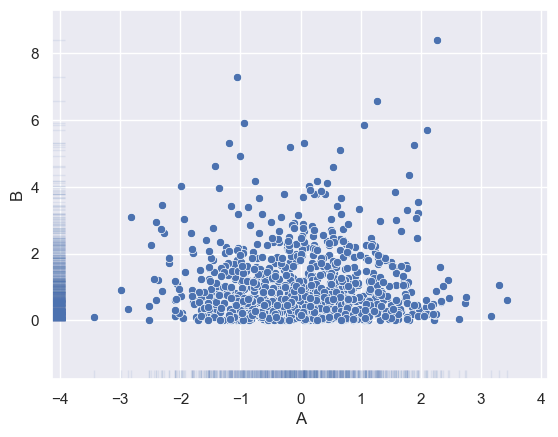

In [186]:
sns.scatterplot(
    data=datos, x="A", y="B"
)
sns.rugplot(
    data=datos, x="A", y="B",
    alpha=0.1
)
plt.show()

## Visualización multivariable

En esta sección se muestran diferentes ejemplos de mostrar la relaciones entre más de 2 variables en un gráfico.

- Gráfica de barras (1 num, 2 cat)
- Gráfica de caja (1 num, 2 cat)
- Gráfica de violín (1 num, 2 cat)
- Gráfica de dispersión (2 num, 1 cat)
- Gráfica de KDE 2D (2 num, 1 cat)
- Histograma 2D (2 num, 1 cat)
- Gráfica de dispersión (2 num, 2 cat)
- Gráfica de dispersión (3 num)
- Gráfica de dispersión (3 num, 1 cat)
- Gráfica de dispersión (2 num, 3 cat)
- Gráfica de dispersión (3 num, 2 cat)

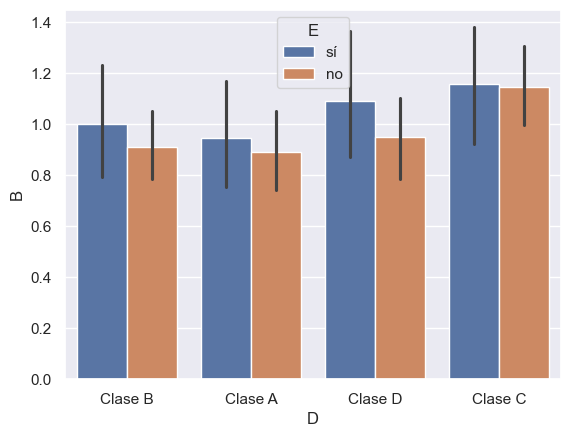

In [187]:
sns.barplot(
    data=datos,
    x="D",y="B", hue="E",
    estimator="mean",
    errorbar="ci"
)
plt.show()

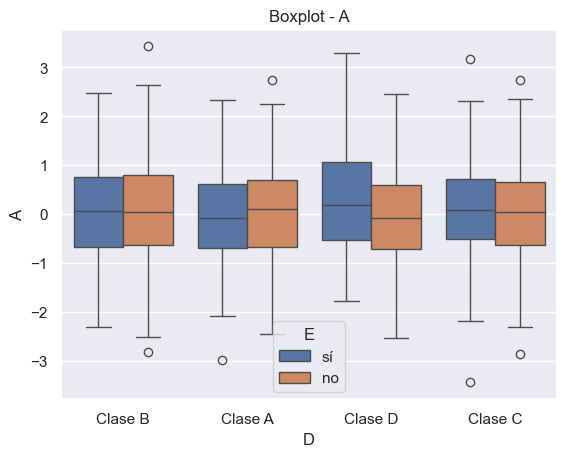

In [205]:
sns.boxplot(data=datos, x="D", y="A", hue="E")
plt.title("Boxplot - A")
plt.show()

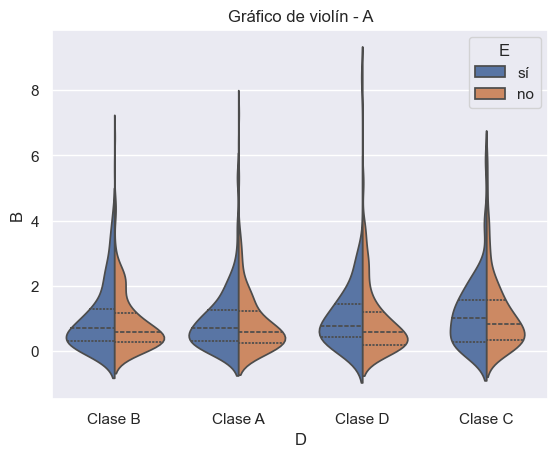

In [192]:
sns.violinplot(
    data=datos, x="D", y="B",
    hue="E",split=True,inner="quart"
)
plt.title("Gráfico de violín - A")
plt.show()

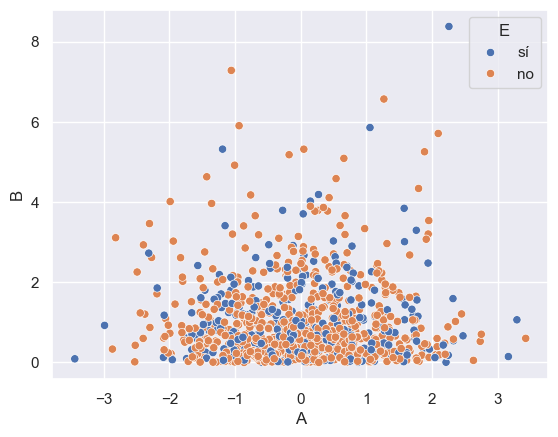

In [194]:
sns.scatterplot(
    data=datos, x="A", y="B",
    hue="E"
)
plt.show()

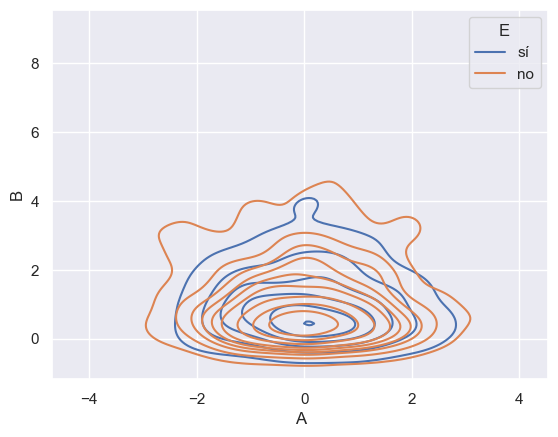

In [196]:
sns.kdeplot(
    data=datos, x="A", y="B",
    hue="E"
)
plt.show()

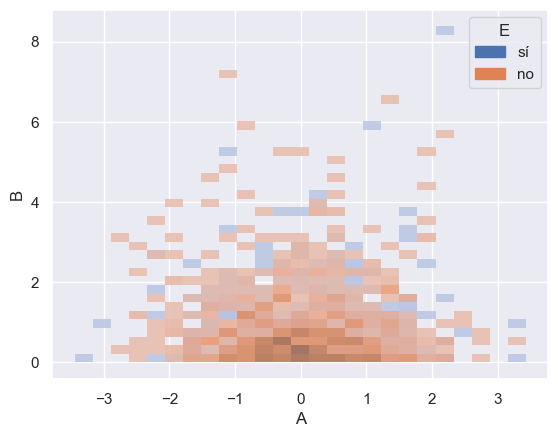

In [200]:
sns.histplot(
    data=datos, x="A", y="B",
    hue="E", alpha=0.8
)
plt.show()

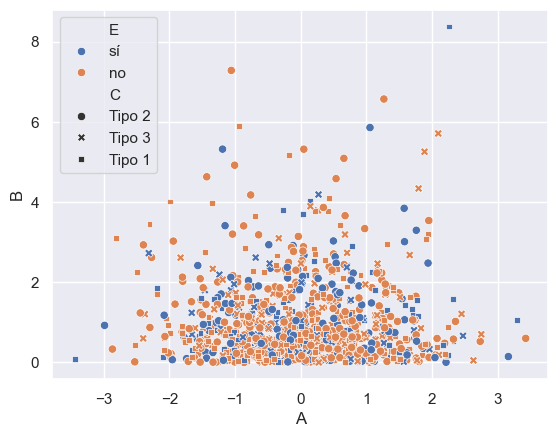

In [201]:
sns.scatterplot(
    data=datos, x="A", y="B",
    hue="E", style="C"
)
plt.show()

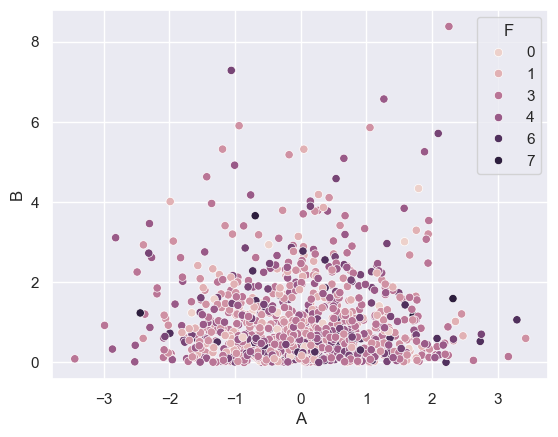

In [206]:
sns.scatterplot(
    data=datos, x="A", y="B",
    hue="F"
)
plt.show()